### Bootstrap

#### Packages

In [1]:
import pandas as pkg_pandas
import math as pkg_math
from matplotlib import pyplot as pkg_plot
from sklearn import model_selection as pkg_model_selection
from sklearn import preprocessing as pkg_preprocessing
from sklearn import tree as pkg_tree
from sklearn import metrics as pkg_metrics
from sklearn import datasets as pkg_datasets
from sklearn import ensemble as pkg_ensemble
import seaborn as pkg_seaborn

#### Load Data

In [2]:
loaded_data = pkg_datasets.load_iris()
dir(loaded_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
print("\nFeature Names = {}\nTarget Names = {}\nColumn".format(\
    loaded_data.feature_names, loaded_data.target_names))


Feature Names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names = ['setosa' 'versicolor' 'virginica']
Column


In [4]:
column_names = []
for feature_name in loaded_data.feature_names:
    column_name = feature_name.replace(' ', '_').replace('(','').replace(')','')
    column_names.append(column_name)

In [5]:
loaded_df = pkg_pandas.DataFrame(loaded_data.data, columns=column_names)
loaded_df['flower_number'] = loaded_data.target
loaded_df['flower_name'] = loaded_df['flower_number'].apply(lambda fnum: loaded_data.target_names[fnum])
loaded_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,flower_number,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Analysis

#### Pre-Work

In [6]:
# Initialize
baseline_df = loaded_df

In [7]:
output_column_name = 'flower_number'
baseline_outputs = baseline_df[output_column_name]
baseline_inputs = baseline_df.drop(columns=[output_column_name, 'flower_name'])

train_inputs, test_inputs, train_outputs, test_outputs  = \
    pkg_model_selection.train_test_split(baseline_inputs, baseline_outputs, test_size=0.20)

print("=== Baseline Split - Train and Test ===")
print("Lengths: Baseline = {}, Train = {}, Test = {}".format(len(baseline_inputs), len(train_inputs), len(test_inputs)))

=== Baseline Split - Train and Test ===
Lengths: Baseline = 150, Train = 120, Test = 30


#### Model: Train (Fit)

In [8]:
best_model = None
best_params = []
best_test_score = 0
best_predicted_outputs = None

for criteria_type in ['gini','entropy','log_loss']:
    for feature_type in ['sqrt', 'log2']:
        for class_weight_type in ['balanced', 'balanced_subsample']:
            for estimator_count in [20, 40, 70, 100, 150, 250]:
                # Parameter Combination
                params = [criteria_type, feature_type, class_weight_type, str(estimator_count)]
                param_name = '_'.join(params)

                # Train
                model = pkg_ensemble.RandomForestClassifier(n_estimators=estimator_count, criterion=criteria_type, max_features=feature_type, class_weight=class_weight_type)
                model.fit(train_inputs, train_outputs)

                # Test
                predicted_outputs = model.predict(test_inputs)

                # Score
                baseline_score = model.score(baseline_inputs, baseline_outputs)
                train_score = model.score(train_inputs, train_outputs)
                test_score = model.score(test_inputs, test_outputs)
                print("DEBUG:: Scores({}): Baseline = {}, Train = {}, Test = {}".format(param_name, baseline_score, train_score, test_score))

                if (best_test_score < test_score):
                    best_model = model
                    best_params = params
                    best_test_score = test_score
                    best_predicted_outputs = predicted_outputs

DEBUG:: Scores(gini_sqrt_balanced_20): Baseline = 0.9933333333333333, Train = 1.0, Test = 0.9666666666666667
DEBUG:: Scores(gini_sqrt_balanced_40): Baseline = 0.9866666666666667, Train = 1.0, Test = 0.9333333333333333
DEBUG:: Scores(gini_sqrt_balanced_70): Baseline = 0.9933333333333333, Train = 1.0, Test = 0.9666666666666667
DEBUG:: Scores(gini_sqrt_balanced_100): Baseline = 0.9866666666666667, Train = 1.0, Test = 0.9333333333333333
DEBUG:: Scores(gini_sqrt_balanced_150): Baseline = 0.9866666666666667, Train = 1.0, Test = 0.9333333333333333
DEBUG:: Scores(gini_sqrt_balanced_250): Baseline = 0.9933333333333333, Train = 1.0, Test = 0.9666666666666667
DEBUG:: Scores(gini_sqrt_balanced_subsample_20): Baseline = 0.9866666666666667, Train = 1.0, Test = 0.9333333333333333
DEBUG:: Scores(gini_sqrt_balanced_subsample_40): Baseline = 0.9866666666666667, Train = 1.0, Test = 0.9333333333333333
DEBUG:: Scores(gini_sqrt_balanced_subsample_70): Baseline = 0.9933333333333333, Train = 1.0, Test = 0.966

In [9]:
print("= = : Best Model : = =")
print("Params = {}, Test Score = {}".format(best_params, best_test_score))

= = : Best Model : = =
Params = ['gini', 'sqrt', 'balanced', '20'], Test Score = 0.9666666666666667


#### Confusion Matrix

In [10]:
cm = pkg_metrics.confusion_matrix(y_true=test_outputs, y_pred=best_predicted_outputs)
cm

array([[ 9,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  9]])

<AxesSubplot:>

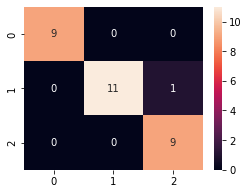

In [11]:
%matplotlib inline
pkg_plot.figure(figsize=(4,3))
pkg_plot.xlabel('Predicted')
pkg_plot.xlabel('Actual')
pkg_seaborn.heatmap(cm, annot=True)